I started my acquaintance with the Julia language by analyzing fictitious medical research. I chose the topic of healthcare because I would like to continue my thesis submitted at the bachelor's program, which examined the digitalization development of a nursing home, and the Julia language proves to be a good tool for this purpose.

Sample drawn from population admitted with skin and soft tissue infection due to diabetes mellitus

Classify infections into two groups by definiton:

    1 - Minor infection
    2 - Major infection
    
Descriptive statistics:

    1. Count of number per group of infection
    2. Count of number per group of gender
    3. Mean of age
    4. Summary of HbA1c and CRP
    5. Age analysis and age distribution by type of infection
    6. Age analysis and age distribution by type of gender
    7. HbA1c analysis by type of infection and by gender
    8. CRP analysis by type of infection and by gender


# Importing packages

In [1]:
using Pkg

In [2]:
Pkg.add("IJulia")
Pkg.add("DataFrames")
Pkg.add("Gadfly")
Pkg.add("StatsBase")
Pkg.add("Distributions")
Pkg.add("CSV")

    Updating registry at `C:\Users\Lenovo ThinkPad T450\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Lenovo ThinkPad T450\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Lenovo ThinkPad T450\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Lenovo ThinkPad T450\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Lenovo ThinkPad T450\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Lenovo ThinkPad T450\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Lenovo ThinkPad T450\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Lenovo ThinkPad T450\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Lenovo ThinkPad T450\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Lenovo ThinkPad T450\.julia\e

In [3]:
using IJulia
using DataFrames
using Gadfly
using StatsBase
using Distributions
using CSV

# Import dataset

In [85]:
df = DataFrame(CSV.File("Raw_data.csv"))

Row,PatientID,Cat1,Cat2,Var1,Var2,Var3
,Int64,String1,String1,Float64,Float64,Float64
1,1,A,C,38.2568,5.93913,35.0579
2,2,A,C,17.8317,5.34754,21.131
3,8,A,B,16.0218,6.60709,60.9436
4,9,A,C,45.1158,6.00733,21.8797
5,16,A,C,20.448,8.54819,20.6623
6,18,A,B,28.3549,7.95642,33.1807
7,25,A,C,22.4497,6.34618,40.2365
8,28,A,B,48.4125,5.32583,28.8956
9,29,A,C,40.0075,11.4189,71.5911


In [86]:
#Making sure there are no NA-values and looking at the data types
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,PatientID,60.5,1,60.5,120,0,Int64
2,Cat1,,A,,B,0,String1
3,Cat2,,B,,X,0,String1
4,Var1,27.9679,15.2356,22.6801,84.2378,0,Float64
5,Var2,5.92121,3.01173,5.64241,15.5826,0,Float64
6,Var3,51.95,20.3153,44.3042,147.397,0,Float64


# Changing coded values

In [87]:
#Changing the values of Cat1
# A was Minor infections
# B was Major infections 
df.Cat1 .= replace.(df.Cat1, "A" => "Minor infection")
df.Cat1 .= replace.(df.Cat1, "B" => "Major infection")

120-element Vector{String}:
 "Minor infection"
 "Minor infection"
 "Minor infection"
 "Minor infection"
 "Minor infection"
 "Minor infection"
 "Minor infection"
 "Minor infection"
 "Minor infection"
 "Minor infection"
 "Minor infection"
 "Minor infection"
 "Minor infection"
 ⋮
 "Major infection"
 "Major infection"
 "Major infection"
 "Major infection"
 "Major infection"
 "Major infection"
 "Major infection"
 "Major infection"
 "Major infection"
 "Major infection"
 "Major infection"
 "Major infection"

In [88]:
#Changing the values of Cat2
df.Cat2 .= replace.(df.Cat2, "L" => "Male", "B" => "Male", "F" => "Male", "C" => "Female", "X" => "Female", "R" => "Female")

120-element Vector{String}:
 "Female"
 "Female"
 "Male"
 "Female"
 "Female"
 "Male"
 "Female"
 "Male"
 "Female"
 "Female"
 "Male"
 "Male"
 "Male"
 ⋮
 "Female"
 "Male"
 "Female"
 "Male"
 "Female"
 "Male"
 "Female"
 "Female"
 "Male"
 "Female"
 "Female"
 "Male"

In [89]:
#Changing the values of Var1
nrows, ncols = size(df)
const fractional_digits = 0
for r in 1:nrows
    age_var = df[r, :Var1]
    df[!,:Var1] = floor.(df[:,:Var1], digits=fractional_digits)
end

In [90]:
# Renaming the columns
rename!(df, [:Cat1, :Cat2, :Var1, :Var2, :Var3] .=> [:Infection, :Gender, :Age, :HbA1c, :CRP])
first(df)

Row,PatientID,Infection,Gender,Age,HbA1c,CRP
,Int64,String,String,Float64,Float64,Float64
1,1,Minor infection,Female,38.0,5.93913,35.0579


# Descriptive statistics

In [91]:
# 1. Count of number per group of infection
inf_groups = combine(groupby(df, :Infection), d -> DataFrame(Number = size(d,1)))

Row,Infection,Number
,String,Int64
1,Minor infection,60
2,Major infection,60


In [92]:
# 2. Count of number per group of gender
gender_groups = combine(groupby(df, :Gender), d -> DataFrame(Number = size(d,1)))

Row,Gender,Number
,String,Int64
1,Female,60
2,Male,60


In [93]:
# 3. Mean of age
floor.(Int, mean(df.Age))

27

    HbA1c value  Metabolic state

        ≤5.6%	 normal
    
     5.7-6.4%	 prediabetes
 
        ≥6.5%	 diabetes

In [94]:
# 4. Summary of HbA1c and CRP
describe(df.HbA1c)

Summary Stats:
Length:         120
Missing Count:  0
Mean:           5.921205
Minimum:        3.011733
1st Quartile:   4.065523
Median:         5.642406
3rd Quartile:   6.839651
Maximum:        15.582649
Type:           Float64


In general we can say that a C-reactive protein level below 10mg/l is considered within the normal range, while - it can even reach 1000mg/l - we are talking about a high CRP value

In [95]:
# 4. Summary of HbA1c and CRP
describe(df.CRP)

Summary Stats:
Length:         120
Missing Count:  0
Mean:           51.950031
Minimum:        20.315296
1st Quartile:   32.235514
Median:         44.304176
3rd Quartile:   64.858850
Maximum:        147.397402
Type:           Float64


5. Age analysis by type of infection:

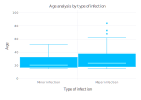

In [96]:
#Using the Gadfly package
plot(df, x = "Infection", y = "Age", Geom.boxplot, Guide.title("Age analysis by type of infection"), Guide.xlabel("Type of infection"), Guide.ylabel("Age"))

Age distribution by type of infection:

In [97]:
function bin_age(Age)
           if Age > 85 
               "85+"
           elseif Age >= 80  
               "80-84"
           elseif Age >= 75
               "75-79"
           elseif Age >= 70
               "70-74"
           elseif Age >= 65
               "65-69"
           elseif Age >= 60
               "60-64"
           elseif Age >= 55
               "55-59"
           elseif Age >= 50  
               "50-54"
           elseif Age >= 45
               "45-49"
           elseif Age >= 40
               "40-44"
           elseif Age >= 35
               "35-39"
           elseif Age >= 30
               "30-34"
           elseif Age >= 25
               "25-29"
           elseif Age >= 20
               "20-24"
           elseif Age >= 15
               "15-19"
           elseif Age >= 10
               "10-14"
           elseif Age >= 5
               "5-9"
           else
               "0-5"
           end
       end

df.Agerange = bin_age.(df.Age)
df

Row,PatientID,Infection,Gender,Age,HbA1c,CRP,Agerange
,Int64,String,String,Float64,Float64,Float64,String
1,1,Minor infection,Female,38.0,5.93913,35.0579,35-39
2,2,Minor infection,Female,17.0,5.34754,21.131,15-19
3,8,Minor infection,Male,16.0,6.60709,60.9436,15-19
4,9,Minor infection,Female,45.0,6.00733,21.8797,45-49
5,16,Minor infection,Female,20.0,8.54819,20.6623,20-24
6,18,Minor infection,Male,28.0,7.95642,33.1807,25-29
7,25,Minor infection,Female,22.0,6.34618,40.2365,20-24
8,28,Minor infection,Male,48.0,5.32583,28.8956,45-49
9,29,Minor infection,Female,40.0,11.4189,71.5911,40-44


In [98]:
function bin_hba1c(HbA1c)
           if HbA1c >= 6.5 
               "diabetes"
           elseif HbA1c >= 5.7  
               "prediabetes"
           else
               "normal"
           end
       end

df.HbA1cRange = bin_hba1c.(df.HbA1c)
df

Row,PatientID,Infection,Gender,Age,HbA1c,CRP,Agerange,HbA1cRange
,Int64,String,String,Float64,Float64,Float64,String,String
1,1,Minor infection,Female,38.0,5.93913,35.0579,35-39,prediabetes
2,2,Minor infection,Female,17.0,5.34754,21.131,15-19,normal
3,8,Minor infection,Male,16.0,6.60709,60.9436,15-19,diabetes
4,9,Minor infection,Female,45.0,6.00733,21.8797,45-49,prediabetes
5,16,Minor infection,Female,20.0,8.54819,20.6623,20-24,diabetes
6,18,Minor infection,Male,28.0,7.95642,33.1807,25-29,diabetes
7,25,Minor infection,Female,22.0,6.34618,40.2365,20-24,prediabetes
8,28,Minor infection,Male,48.0,5.32583,28.8956,45-49,normal
9,29,Minor infection,Female,40.0,11.4189,71.5911,40-44,diabetes


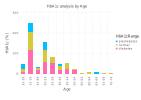

In [99]:

plot(df, x =:Agerange, y=:HbA1c, color=:HbA1cRange, Geom.bar, Guide.title("HbA1c analysis by Age"), Guide.xlabel("Age"), Guide.ylabel("HbA1c (%)"), Theme(bar_spacing=3mm))

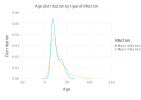

In [100]:
plot(df, x = "Age", color = "Infection", Geom.density, Guide.title("Age distribution by type of infection"), Guide.xlabel("Age"), Guide.ylabel("Distribution"))

6. Age analysis by gender:

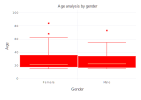

In [101]:
plot(df, x = "Gender", y = "Age", Geom.boxplot, Guide.title("Age analysis by gender"), Guide.xlabel("Gender"), Guide.ylabel("Age"), Theme(default_color=colorant"red"))

Age distribution by gender:

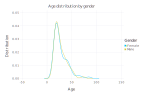

In [102]:
plot(df, x = "Age", color = "Gender", Geom.density, Guide.title("Age distribution by gender"), Guide.xlabel("Age"), Guide.ylabel("Distribution"))

7. HbA1c analysis by type of infection:

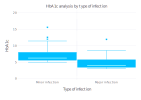

In [103]:
plot(df, x = "Infection", y = "HbA1c", Geom.boxplot, Guide.title("HbA1c analysis by type of infection"), Guide.xlabel("Type of infection"), Guide.ylabel("HbA1c"))

HbA1c analysis by gender:

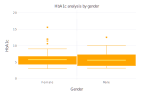

In [104]:
plot(df, x = "Gender", y = "HbA1c", Geom.boxplot, Guide.title("HbA1c analysis by gender"), Guide.xlabel("Gender"), Guide.ylabel("HbA1c"), Theme(default_color = colorant"orange"))

8. CRP analysis by type of infection:

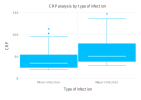

In [105]:
plot(df, x = "Infection", y = "CRP", Geom.boxplot, Guide.title("CRP analysis by type of infection"), Guide.xlabel("Type of infection"), Guide.ylabel("CRP"))

CRP analysis by gender:

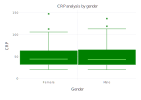

In [106]:
plot(df, x = "Gender", y = "CRP", Geom.boxplot, Guide.title("CRP analysis by gender"), Guide.xlabel("Gender"), Guide.ylabel("CRP"), Theme(default_color = colorant"green"))